# Explore here

In [30]:
!pip install missingno lazypredict
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
from sklearn.impute import KNNImputer
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import xgboost as xgb
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
#from lazypredict.Supervised import LazyRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.ensemble import BaggingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import joblib
from sklearn.preprocessing import LabelEncoder 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV



In [32]:
#1) Descargo los datos de bank:

#a) Leo los datos de la URL.
url = "https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv"

#b) Guardo los datos en un DataFrame.
df = pd.read_csv(url, sep=';')

#c) Miro las primeras filas del DF.
print(df.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [33]:
"""
# Guardo el DataFrame.
df.to_csv('/workspace/Proyecto14_albaebauluz/data/raw/bank.csv', index=False)
#Configuro la biblioteca de Pandas en Python para controlar cómo se muestra el DF cuando los visualizo en un entorno interactivo (Jupyter Notebook). Nota: "None" sirve para que pandas muestre el total de las columnas aunque sean muchas. 
pd.set_option('display.max_columns', None)

df.head()
df.tail()
"""

OSError: Cannot save file into a non-existent directory: '/workspace/Proyecto14_albaebauluz/data/raw'

In [34]:
# Tamaño de la muestra.
df.shape   

# Información de los datos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

La BD tiene 41188 filas y 21 columnas.

In [35]:
# Cuento el número de valores únicos en cada columna del DF.
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

Conclusión: Hay valores repetidos en todas las columnas.

In [36]:
# Compruebo se hay valores duplicados. 
df.duplicated().sum()

np.int64(12)

Hay 12 valores (id) que están duplicados. Es decir, la BD contiene información repetida de 12 personas.

In [37]:
# Muestro los id de los valores duplicados.
duplicados=np.where(df.duplicated())
print(duplicados)

(array([ 1266, 12261, 14234, 16956, 18465, 20216, 20534, 25217, 28477,
       32516, 36951, 38281]),)


In [38]:
# Visualizo la información de los id duplicados.
df.iloc[duplicados]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [39]:
#Compruebo, para el primer caso (id=1266) que el duplicado tiene un índice menor. Para ello localizo los id que tienen las mismas características que el id 1266.
df[(df.age==39)&(df.education=='basic.6y')&(df.job=='blue-collar')&(df.month=='may')&(df.day_of_week=='thu')&(df.duration==124)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


El id 1266 tiene las mismas características que el id 1265.

In [40]:
# Elimino los 12 id duplicados. Nota: "inplace=True" indica que los elimine de la BD original.
df.drop_duplicates(inplace=True)

# Compruebo que se han eliminado los duplicados.
df.duplicated().sum()

np.int64(0)

In [41]:
# Análisis descriptivo de la muestra.
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,41176.0,NaN,NaN,NaN,40.0238,10.42068,17.0,32.0,38.0,47.0,98.0
job,41176,12,admin.,10419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,41176,4,married,24921,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,41176,8,university.degree,12164,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,41176,3,no,32577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,41176,3,yes,21571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,41176,3,no,33938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,41176,2,cellular,26135,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,41176,10,may,13767,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,41176,5,thu,8618,NaN,NaN,NaN,NaN,NaN,NaN,NaN


De las características individuales de los clientes podemos observar que:

Age: La edad media de los individuos de la muestra es de 40 años, con un valor máximo de 98 años(las personas que se encuentren cercanos al valor máximo dudo que contraten un depósito a largo plazo).

Job: Hay 12 categorías de trabajo, siendo la más común "admin" (25.3%).

Marital: Hay 4 categorías de estado civil, siendo la más común "married" (60.5%).

Education: Hay 8 niveles de estudios, siendo el más común "university.degree" (29.5%).

Default: Hay 3 categorías que indican si el individuo tiene crédito actualmente. El 79.1% de la muestra no tiene crádito actualmente.

Housing: Hay 3 categorías que indican si el individuo tiene hipoteca. El 52.4% de la muestra  tiene hipoteca.

Loan: Hay 3 categorías que indican si el individuo tiene un préstamo personal. El 82.4% de la muestra  tiene un préstamo personal.

Contact: Hay 2 categorías que indican el tipo de contacto con el individuo. El 63.5% de la muestra tiene el teléfono como forma de contacto.

Duration: La duración media de la llamada con el cliente es de 258.3 segundos (4.305 minutos). Mientras que el 75% de las llamadas tienen como máximo una duración de 319 segundos (5.3 minutos), la duración máxima de la muestra es de 4918 segundos (1.4 horas). Este último dato, aunque puede ser plausible, alerta sobre la posible existencia de datos atípicos. Tengo que tenerlo en cuenta a la hora de realizar el análisis de la Distancia de Cook.

Campaign: El número medio de contactos realizados en esta campaña al cliente es de 2.57, alcanzando los 3 contactos para el 75% de la muestra. Se puede observar que el número de contactos máximo es de 56. En este caso, al diferir sustancialmente del número de contactos del   Q2 y Q3, cabe pensar que se debe a un error en la muestra.

Previous: En la campaña anterior se contactó con el cliente, en promedio, 0.17 veces, pudiendo alcanzar las 7 llamadas. La falta de valores mayores a 0 en Q1, Q2 y Q3 indica que puede existir un error con los datos de esta variable.

Poutcome: Hay 3 categorías que indican el resultado de la campaña de marketing anterior, siendo el más común "nonexistent" (86.3%).


In [42]:
# Evaluo la incidencia de los valores perdidos en cada una de las variables.
df.isnull().mean()*100

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

Ninguna variable tiene NAN.

In [44]:
# Consulto las categorías de cada veriable.
print(df['default'].value_counts())  # no, unknown, yes
print(df['housing'].value_counts())  # yes, no, unknown
print(df['loan'].value_counts())  # yes, no, unknown
print(df['contact'].value_counts())  # cellular, telephone
print(df['poutcome'].value_counts())  # noexistent, failure, succes
print(df['y'].value_counts())  # no, yes


default
no         32577
unknown     8596
yes            3
Name: count, dtype: int64
housing
yes        21571
no         18615
unknown      990
Name: count, dtype: int64
loan
no         33938
yes         6248
unknown      990
Name: count, dtype: int64
contact
cellular     26135
telephone    15041
Name: count, dtype: int64
poutcome
nonexistent    35551
failure         4252
success         1373
Name: count, dtype: int64
y
no     36537
yes     4639
Name: count, dtype: int64


In [45]:
# Codifico las variables que están en formato "object" (job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome, y). Binarias: contact, y

#1) Creo una instancia de LabelEncoder.
label_encoder = LabelEncoder()

#2) Codifico las columnas categóricas no binarias.
df['job_cod'] = label_encoder.fit_transform(df['job'])
df['marital_cod'] = label_encoder.fit_transform(df['marital'])
df['education_cod'] = label_encoder.fit_transform(df['education'])
df['default_cod'] = label_encoder.fit_transform(df['default'])
df['housing_cod'] = label_encoder.fit_transform(df['housing'])
df['loan_cod'] = label_encoder.fit_transform(df['loan'])
df['month_cod'] = label_encoder.fit_transform(df['month'])
df['day_of_week_cod'] = label_encoder.fit_transform(df['day_of_week'])
df['poutcome_cod'] = label_encoder.fit_transform(df['poutcome'])

#3) Codifico las columnas cetegóricas binarias.
df['contact_cod'] = label_encoder.fit_transform(df['contact'])
df['y_cod'] = label_encoder.fit_transform(df['y'])

In [46]:
# Visualizo el resultado de la codificación.

#1) Creo un diccionario para mapear columnas originales y codificadas.
categorical_columns = {
    'job': 'job_cod',
    'marital': 'marital_cod',
    'education': 'education_cod',
    'default': 'default_cod',
    'housing': 'housing_cod',
    'loan': 'loan_cod',
    'month': 'month_cod',
    'day_of_week': 'day_of_week_cod',
    'poutcome': 'poutcome_cod',
    'contact': 'contact_cod',
    'y': 'y_cod',
}

#2) Itero sobre las variables para mostrar las categorías originales y sus valores codificados.
for original, encoded in categorical_columns.items():
    # Creo un DataFrame temporal que muestra las categorías originales y sus valores codificados.
    categories = pd.DataFrame({
        original: df[original],
        encoded: df[encoded]
    }).drop_duplicates().sort_values(by=encoded).reset_index(drop=True)
    
    # Imprimo las categorías y sus codificaciones.
    print(f"\nCategorías de '{original}' y sus valores codificados en '{encoded}':\n")
    print(categories)


Categorías de 'job' y sus valores codificados en 'job_cod':

              job  job_cod
0          admin.        0
1     blue-collar        1
2    entrepreneur        2
3       housemaid        3
4      management        4
5         retired        5
6   self-employed        6
7        services        7
8         student        8
9      technician        9
10     unemployed       10
11        unknown       11

Categorías de 'marital' y sus valores codificados en 'marital_cod':

    marital  marital_cod
0  divorced            0
1   married            1
2    single            2
3   unknown            3

Categorías de 'education' y sus valores codificados en 'education_cod':

             education  education_cod
0             basic.4y              0
1             basic.6y              1
2             basic.9y              2
3          high.school              3
4           illiterate              4
5  professional.course              5
6    university.degree              6
7             

In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41176.0,40.023800,10.420680,17.000,32.000,38.000,47.000,98.000
duration,41176.0,258.315815,259.305321,0.000,102.000,180.000,319.000,4918.000
campaign,41176.0,2.567879,2.770318,1.000,1.000,2.000,3.000,56.000
pdays,41176.0,962.464810,186.937102,0.000,999.000,999.000,999.000,999.000
previous,41176.0,0.173013,0.494964,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41176.0,0.081922,1.570883,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41176.0,93.575720,0.578839,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41176.0,-40.502863,4.627860,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41176.0,3.621293,1.734437,0.634,1.344,4.857,4.961,5.045
nr.employed,41176.0,5167.034870,72.251364,4963.600,5099.100,5191.000,5228.100,5228.100


In [48]:
# Variables del modelo (dependiente e independientes).

#1) Defino la matrix de variables independientes. Nota: Elimino la variable de interés de los parámetros o regresores del modelo, así como las variables codificadas anteriormente (las que están en formato object).
X = df.drop(['y_cod', 'y', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'contact'], axis=1)
print(X.dtypes)

#2) Defino la variable dependiente.
y = df.y_cod


age                  int64
duration             int64
campaign             int64
pdays                int64
previous             int64
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
job_cod              int64
marital_cod          int64
education_cod        int64
default_cod          int64
housing_cod          int64
loan_cod             int64
month_cod            int64
day_of_week_cod      int64
poutcome_cod         int64
contact_cod          int64
dtype: object


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
model = LogisticRegression()
model.fit(X_train, y_train)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [52]:
accuracy_score(y_test, y_pred)

0.9032297231665857

El modelo de regresión logística acierta el 90.32% de las veces.

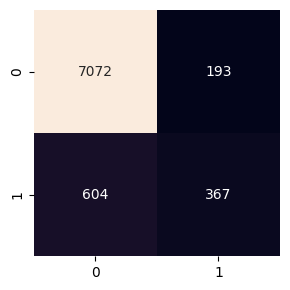

In [53]:
bank_cm = confusion_matrix(y_test, y_pred)

# Dibujaremos esta matriz para hacerla más visual
cm_df = pd.DataFrame(bank_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

- 7072 ejemplos fueron correctamente clasificados como negativos (clase 0).
- 367 ejemplos fueron correctamente clasificados como positivos (clase 1).
- 193 ejemplos fueron incorrectamente clasificados como positivos cuando eran negativos (falsos positivos).
- 604 ejemplos fueron incorrectamente clasificados como negativos cuando eran positivos (falsos negativos).

4. OPTIMIZACIÓN DE HIPERPARÁMETROS

In [54]:
# 4.1. Búsqueda aleatoria (random search).

# Definimos los parámetros que queremos ajustar
hyperparams = {
    "C": np.logspace(-4, 4, 20),
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# Inicializamos la búsqueda aleatoria
random_search = RandomizedSearchCV(model, hyperparams, n_iter = 100, scoring = "accuracy", cv = 5, random_state = 42)
random_search

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, scoring='accuracy')

In [55]:
random_search.fit(X_train, y_train)

print(f"Mejores hiperparámetros: {random_search.best_params_}")

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:34

Mejores hiperparámetros: {'solver': 'newton-cg', 'penalty': 'l2', 'C': np.float64(10000.0)}


In [1]:
model_random_search = LogisticRegression(penalty = "l2", C = np.float64(10000.0), solver = "newton-cg")
model_random_search.fit(X_train, y_train)
y_pred = model_random_search.predict(X_test)

random_search_accuracy = accuracy_score(y_test, y_pred)
random_search_accuracy

NameError: name 'LogisticRegression' is not defined

Los resultados muestran que la precisión ha pasado del 90.32% al 90.47%. Por lo que la precisión a mejorado al optimizar los hiperpadrámetros en un 0.15%.